
 # STEP 1: Ridge Regression (Linear) Closed Form #

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load the data in from the given train/test data sets
train_data = pd.read_csv('Assignment1_Data/ridge_regression_train_data.csv')
test_data = pd.read_csv('Assignment1_Data/ridge_regression_test_data.csv')

# Initalize the variables for both training and test data
X_train_data = train_data['x'].values.reshape(-1, 1)
y_train_data = train_data['y'].values
X_test_data = test_data['x'].values.reshape(-1, 1)
y_test_data = test_data['y'].values

In [3]:
# Implement the ridge regression algorithm (closed form)
def ridge_regression_closed_form(X, y, alpha):
    X_transpose = np.transpose(X)
    identity = np.identity(X.shape[1])
    beta = np.linalg.inv(X_transpose.dot(X) + alpha * identity).dot(X_transpose).dot(y)
    return beta

# Add a bias term to X_train
X_train_bias = np.c_[np.ones((X_train_data.shape[0], 1)), X_train_data]

# Fit ridge regression model
alpha = 0.1  # regularization parameter
beta = ridge_regression_closed_form(X_train_bias, y_train_data, alpha)


In [4]:
# Compute RMSE and MAE
def compute_errors(X, y, beta):
    y_pred = X.dot(beta)
    rmse = np.sqrt(np.mean((y_pred - y) ** 2))
    mae = np.mean(np.abs(y_pred - y))
    return rmse, mae

# Compute errors on training data
rmse_train, mae_train = compute_errors(X_train_bias, y_train_data, beta)

# Compute errors on test data
X_test_bias = np.c_[np.ones((X_test_data.shape[0], 1)), X_test_data]
rmse_test, mae_test = compute_errors(X_test_bias, y_test_data, beta)

### Linear Ridge Regression Plot ###

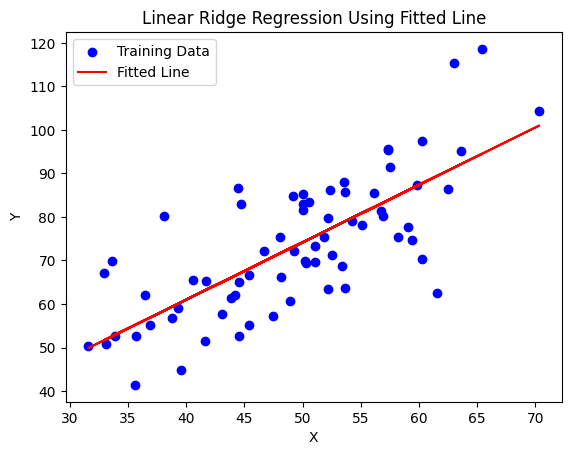

Root Mean Square Error on train data set: 10.370433170923315
Mean Absolute Error on train data set: 8.120413961842955
Root Mean Square Error on test data set: 10.37530472101123
Mean Absolute Error on test data set: 8.372365369792016


In [5]:
# Plotting the fitted line using trained data input
plt.scatter(X_train_data, y_train_data, color='blue', label='Training Data')
plt.plot(X_train_data, X_train_bias.dot(beta), color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Ridge Regression Using Fitted Line')
plt.legend()
plt.show()

print("Root Mean Square Error on train data set:", rmse_train)
print("Mean Absolute Error on train data set:", mae_train)
print("Root Mean Square Error on test data set:", rmse_test)
print("Mean Absolute Error on test data set:", mae_test)


 # STEP 2: Polynomial Regression Closed Form #

In [228]:
# Read the training and test data for polynomial regression
train_data_poly = pd.read_csv('Assignment1_Data/polynomial_regression_train_data.csv')
test_data_poly = pd.read_csv('Assignment1_Data/polynomial_regression_test_data.csv')

# Extract the features (X) and target variable (y) from the training and test data
X_poly_train = train_data_poly['x'].values.reshape(-1, 1)
y_poly_train = train_data_poly['y'].values
X_poly_test = test_data_poly['x'].values.reshape(-1, 1)
y_poly_test = test_data_poly['y'].values

In [229]:
# Function to add polynomial features up to a specified degree
def add_polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, X ** i]
    return X_poly

# Specify the degree for the polynomial features
degree = 5

# Add polynomial features to the training and test data
X_extended_poly_train= add_polynomial_features(X_poly_train, degree)
X_extended_poly_test = add_polynomial_features(X_poly_test, degree)

In [230]:
# Implement Polynomial Ridge Regression (Closed Form)
def polynomial_ridge_regression_closed_form(X, y, alpha):
    X_transpose = np.transpose(X)
    identity = np.identity(X.shape[1])
    beta = np.linalg.inv(X_transpose.dot(X) + alpha * identity).dot(X_transpose).dot(y)
    return beta

# Specify the regularization parameter alpha for the polynomial ridge regression
alpha_poly = 0.1

# Fit the polynomial ridge regression model
beta_poly = polynomial_ridge_regression_closed_form(X_extended_poly_train, y_poly_train, alpha_poly)

In [231]:
# Function to compute RMSE and MAE for polynomial regression
def compute_errors_poly(X, y, beta):
    y_pred = X.dot(beta)
    rmse = np.sqrt(np.mean((y_pred - y) ** 2))
    mae = np.mean(np.abs(y_pred - y))
    return rmse, mae

# Computing RMSE and MAE for polynomial regression on the training data
rmse_train_poly, mae_train_poly = compute_errors_poly(X_extended_poly_train, y_poly_train, beta_poly)

# Computing RMSE and MAE for polynomial regression on the test data
rmse_test_poly, mae_test_poly = compute_errors_poly(X_extended_poly_test, y_poly_test, beta_poly)

### Polynomial Ridge Regression Plot ###

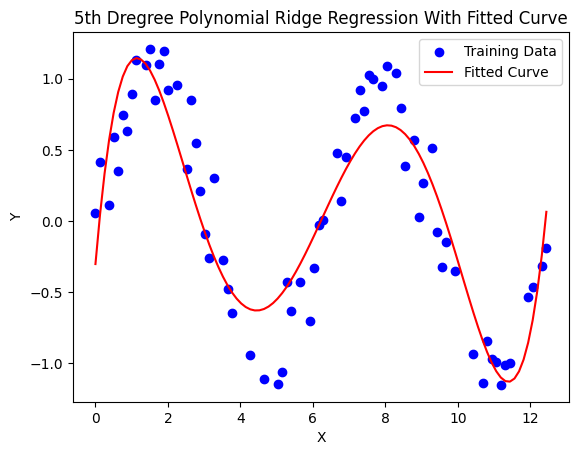

Root mean square error on the training data using polynomial regression): 0.2948550204922654
Mean absolute error on the training data using polynomial regression): 0.2435961802500696
Root mean square error on the test data using polynomial regression): 0.28743527072826025
Mean absolute error on the test data using polynomial regression): 0.23422571768386338


In [232]:
# Plot the fitted curve along with the input training data for polynomial regression
plt.scatter(X_poly_train, y_poly_train, color='blue', label='Training Data')
x_vals = np.linspace(np.min(X_poly_train), np.max(X_poly_train), 100)
x_vals_extended = add_polynomial_features(x_vals.reshape(-1, 1), degree)
plt.plot(x_vals, x_vals_extended.dot(beta_poly), color='red', label='Fitted Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('5th Dregree Polynomial Ridge Regression With Fitted Curve')
plt.legend()
plt.show()

# Print the RMSE and MAE for polynomial regression on both the training and test data
print("Root mean square error on the training data using polynomial regression):", rmse_train_poly)
print("Mean absolute error on the training data using polynomial regression):", mae_train_poly)
print("Root mean square error on the test data using polynomial regression):", rmse_test_poly)
print("Mean absolute error on the test data using polynomial regression):", mae_test_poly)


 ## STEP 3: Ridge Regression With Gradient Descent ##

In [233]:
# Read the training data for Ridge Regression
train_data = pd.read_csv('Assignment1_Data/ridge_regression_train_data.csv')

# Extract the input features (x) and target variable (y) from the training data
X_train_data = train_data['x'].values.reshape(-1, 1)
y_train_data = train_data['y'].values

# Add a bias term to the input features x and y
X_train_bias = np.c_[np.ones((X_train_data.shape[0], 1)), X_train_data]

In [234]:
# Function used to compute the cost function for Ridge Regression
def compute_cost(X, y, beta, alpha):
    m = len(y)
    J = (1/(2*m)) * np.sum((X.dot(beta) - y)**2) + (alpha/(2*m)) * np.sum(beta**2)
    return J

In [235]:
# Function used to compute the gradient of the cost function for Ridge Regression
def compute_gradient(X, y, beta, alpha):
    m = len(y)
    gradient = (1/m) * X.T.dot(X.dot(beta) - y) + (alpha/m) * beta
    return gradient

In [236]:
# Implementation for the batch gradient descent for ridge regression
def ridge_regression_gradient_descent(X, y, alpha, learning_rate, iterations):
    beta = np.zeros(X.shape[1])  # Initialize beta to zeros
    cost_history = []
    
    for i in range(iterations):
        # Compute cost and gradient
        cost = compute_cost(X, y, beta, alpha)
        gradient = compute_gradient(X, y, beta, alpha)
        
        # Update beta using gradient descent
        beta -= learning_rate * gradient
        
        # Append cost to history
        cost_history.append(cost)
    
    return beta, cost_history

# Set the hyperparameters for gradient descent
alpha_ridge = 0.1  # regularization parameter
learning_rate_ridge = 0.0001
iterations_ridge = 1000

# Fit the model using gradient descent
beta_ridge, cost_history_ridge = ridge_regression_gradient_descent(X_train_bias, y_train_data, alpha_ridge, learning_rate_ridge, iterations_ridge)

# Compute RMSE and MAE for training data
y_train_pred_ridge = X_train_bias.dot(beta_ridge)
rmse_train_ridge = np.sqrt(np.mean((y_train_pred_ridge - y_train_data) ** 2))
mae_train_ridge = np.mean(np.abs(y_train_pred_ridge - y_train_data))

### Gradient Descent Ridge Regression Plot ###

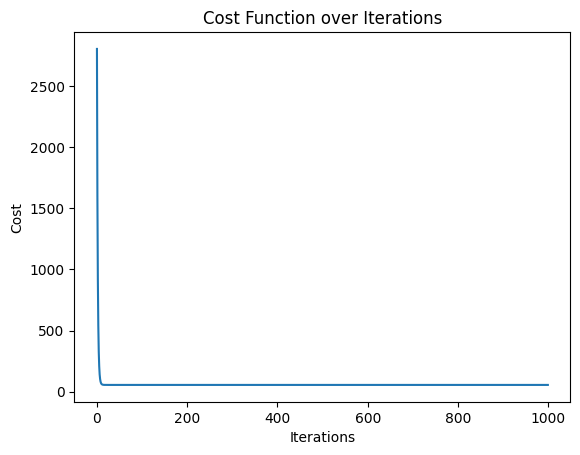

Root Mean Square Error on train data set using gradient descent: 10.481544401408337
Mean Absolute Error on train data set using gradient descent: 8.139445645963567


In [237]:
# Plotting the cost function over 
plt.plot(range(iterations_ridge), cost_history_ridge)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

# Output for the RMSE and MAE for training data
print("Root Mean Square Error on train data set using gradient descent:", rmse_train_ridge)
print("Mean Absolute Error on train data set using gradient descent:", mae_train_ridge)



 ## BONUS: Exact Line Search ##

In [238]:
#Define Gradient Descent with Exact Line Search
def gradient_descent_exact_line_search(X, y, alpha, learning_rate, max_iters=1000, tol=1e-6):
    
    # Initialize parameters
    beta = np.zeros(X.shape[1])  # Initialize beta to zeros
    cost_history = []  # Initialize an empty list to store the cost at each iteration
    beta_history = [beta]  # Initialize a list to store the beta values at each iteration
    
    # Compute initial cost
    cost = np.mean((X.dot(beta) - y)**2) + alpha * np.linalg.norm(beta)**2
    cost_history.append(cost)  # Append initial cost to history
    
    # Perform gradient descent
    for i in range(max_iters):
        gradient = 2 * X.T.dot(X.dot(beta) - y) + 2 * alpha * beta  # Compute the gradient
        # Exact line search
        eta = np.sum(gradient ** 2) / np.sum(gradient.dot(X.T.dot(X.dot(gradient) - y)))  # Compute the step size
        beta = beta - learning_rate * eta * gradient  # Update beta using the step size and gradient
        
        # Compute new cost
        new_cost = np.mean((X.dot(beta) - y)**2) + alpha * np.linalg.norm(beta)**2
        cost_history.append(new_cost)  # Append the new cost to history
        
        # Check for convergence
        if np.abs(new_cost - cost) < tol:  # If the change in cost is below the tolerance, break
            break
        
        cost = new_cost  # Update the cost
        beta_history.append(beta)  # Append the new beta to beta history
        
    return beta, cost_history, beta_history  # Return the final beta, cost history, and beta history


### Exact Line Gradient Descent Plot ###

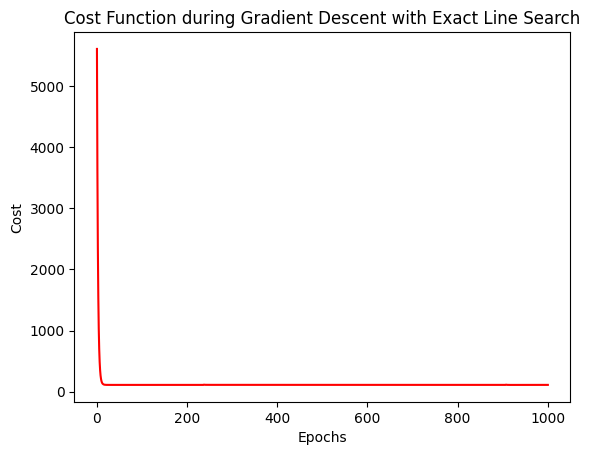

In [239]:
# Run gradient descent with exact line search
learning_rate = 0.1  # Set the learning rate
beta_exact, cost_history_exact, beta_history_exact = gradient_descent_exact_line_search(X_train_bias, y_train_data, alpha, learning_rate)

# Plot Cost Function
plt.plot(range(len(cost_history_exact)), cost_history_exact, color='red')  # Plot the cost function over epochs
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function during Gradient Descent with Exact Line Search')
plt.show()

In [240]:
# Compute errors on training data
rmse_train_exact, mae_train_exact = compute_errors(X_train_bias, y_train_data, beta_exact)

# Compute errors on test data
rmse_test_exact, mae_test_exact = compute_errors(X_test_bias, y_test_data, beta_exact)

### Linear Ridge Regression with Exact Line Plot ###

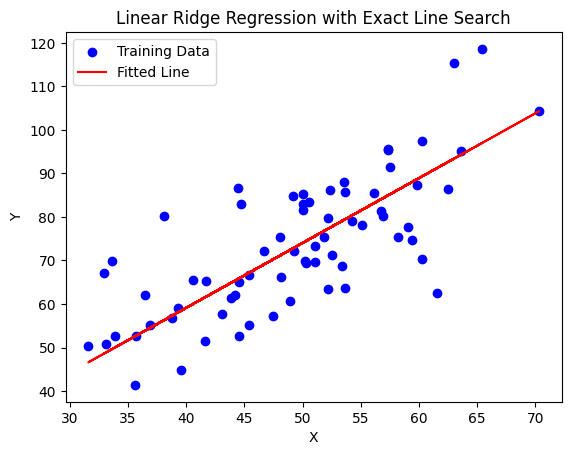

Root Mean Square Error on training data with exact line search: 10.494246235513552
Mean Absolute Error on training data with exact line search: 8.149463395807787
Root Mean Square Error on test data with exact line search: 10.692689652968527
Mean Absolute Error on test data with exact line search: 8.850548154264608


In [241]:
# Plot the fitted line and input training data
plt.scatter(X_train_data, y_train_data, color='blue',label='Training Data')  # Plot the training data
plt.plot(X_train_data, X_train_bias.dot(beta_exact), color='red', label='Fitted Line')  # Plot the fitted line
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Ridge Regression with Exact Line Search')
plt.legend()
plt.show()

# Output the RMSE and MAE for training and test data
print("Root Mean Square Error on training data with exact line search:", rmse_train_exact)
print("Mean Absolute Error on training data with exact line search:", mae_train_exact)
print("Root Mean Square Error on test data with exact line search:", rmse_test_exact)
print("Mean Absolute Error on test data with exact line search:", mae_test_exact)